In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import pandas as pd
import io
# Path to your .pkl file
file_path = 'ncrptd.pkl'
file_path2 = 'ri.pkl'

ncrptd_df = pd.read_pickle(file_path)
ncrptd_df = ncrptd_df.reset_index()
ri_df = pd.read_pickle(file_path2)



In [7]:
from datetime import datetime, timedelta
def decrypt(df_tm_data_encrypt):
  df_tm_data_decrypt = df_tm_data_encrypt.copy()
  df_tm_data_decrypt['pd'] = df_tm_data_encrypt['pd'] + 1703 #param_id
  df_tm_data_decrypt['tt'] = df_tm_data_encrypt['tt'] + timedelta(days=10000) #tm_time
  df_tm_data_decrypt['tv'] = df_tm_data_encrypt['tv'] / 1.1 #tm_value
  return df_tm_data_decrypt

In [8]:
print(ncrptd_df)

                  wd    pd                  tt     tv
0         6110297076 -1483 1996-11-14 13:14:08   0.00
1         6110297076 -1483 1996-11-14 13:14:38   0.00
2         6110297076 -1483 1996-11-14 13:15:08   0.00
3         6110297076 -1483 1996-11-14 13:15:38   0.00
4         6110297076 -1483 1996-11-14 13:16:08   0.00
...              ...   ...                 ...    ...
15497320  2860192076 -1302 1996-11-14 23:58:03  39.27
15497321  2860192076 -1302 1996-11-14 23:58:33  38.61
15497322  2860192076 -1302 1996-11-14 23:59:03   0.00
15497323  2860192076 -1302 1996-11-14 23:59:04   0.00
15497324  2860192076 -1302 1996-11-14 23:59:33   0.00

[15497325 rows x 4 columns]


In [9]:
decrypt_df = decrypt(ncrptd_df)
print(decrypt_df)

                  wd   pd                  tt    tv
0         6110297076  220 2024-04-01 13:14:08   0.0
1         6110297076  220 2024-04-01 13:14:38   0.0
2         6110297076  220 2024-04-01 13:15:08   0.0
3         6110297076  220 2024-04-01 13:15:38   0.0
4         6110297076  220 2024-04-01 13:16:08   0.0
...              ...  ...                 ...   ...
15497320  2860192076  401 2024-04-01 23:58:03  35.7
15497321  2860192076  401 2024-04-01 23:58:33  35.1
15497322  2860192076  401 2024-04-01 23:59:03   0.0
15497323  2860192076  401 2024-04-01 23:59:04   0.0
15497324  2860192076  401 2024-04-01 23:59:33   0.0

[15497325 rows x 4 columns]


In [10]:
# Display the DataFrame

print(ri_df)

     work_time stop_time regime_mode         pid_name is_pid_adj  \
0         None      None         ПДФ             None        0.0   
1        40.00     50.00         ПДФ             None        0.0   
2         None      None         ПДФ             None        0.0   
3         None      None         ПДФ             None        0.0   
4        27.00      3.00         ПДФ     Сила тока, А        0.0   
...        ...       ...         ...              ...        ...   
3627      3.00     12.00         ПКВ     Сила тока, А        1.0   
3628      8.00      2.00         ПДФ     Сила тока, А        1.0   
3629    460.00    140.00         ПКВ             None        0.0   
3630    100.00    140.00         АПВ  Загрузка ПЭД, %        1.0   
3631      None      None         ПДФ             None        0.0   

     pid_adj_min_current_freq pid_adj_max_current_freq  \
0                        None                     None   
1                        None                     None   
2        

In [11]:
def count_unique_values(df, column):
    """
    Get the count of unique values in a specified DataFrame column.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        column (str): The name of the column.

    Returns:
        int: Number of unique values in the column.
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame columns: {df.columns}.")

    unique_values = df[column].unique()
    unique_count = len(unique_values)

    print(f"Number of unique values in column '{column}': {unique_count}")
    print(f"Unique values in column '{column}': {unique_values}")

    return unique_count, unique_values.tolist()

In [12]:
def test_columns(df):
  columns = df.columns
  print(columns)
  for col in columns:
    count_unique_values(df, col)

In [13]:
test_columns(decrypt_df)

Index(['wd', 'pd', 'tt', 'tv'], dtype='object')
Number of unique values in column 'wd': 3578
Unique values in column 'wd': [6110297076 3130128676 3130130076 ... 2860191976 3130676276 2860429376]
Number of unique values in column 'pd': 5
Unique values in column 'pd': [ 220  401 1451  188  200]
Number of unique values in column 'tt': 86401
Unique values in column 'tt': <DatetimeArray>
['2024-04-01 13:14:08', '2024-04-01 13:14:38', '2024-04-01 13:15:08',
 '2024-04-01 13:15:38', '2024-04-01 13:16:08', '2024-04-01 13:16:38',
 '2024-04-01 13:17:08', '2024-04-01 13:17:38', '2024-04-01 13:18:08',
 '2024-04-01 13:18:38',
 ...
 '2024-04-01 07:31:40', '2024-04-01 07:35:40', '2024-04-01 07:36:40',
 '2024-04-01 07:47:40', '2024-04-01 08:01:40', '2024-04-01 08:04:10',
 '2024-04-01 08:07:40', '2024-04-01 16:01:23', '2024-04-01 22:27:51',
 '2024-04-01 07:42:40']
Length: 86401, dtype: datetime64[ns]
Number of unique values in column 'tv': 22319
Unique values in column 'tv': [  0.    52.    34.1  ... 12

In [14]:
test_columns(ncrptd_df)

Index(['wd', 'pd', 'tt', 'tv'], dtype='object')
Number of unique values in column 'wd': 3578
Unique values in column 'wd': [6110297076 3130128676 3130130076 ... 2860191976 3130676276 2860429376]
Number of unique values in column 'pd': 5
Unique values in column 'pd': [-1483 -1302  -252 -1515 -1503]
Number of unique values in column 'tt': 86401
Unique values in column 'tt': <DatetimeArray>
['1996-11-14 13:14:08', '1996-11-14 13:14:38', '1996-11-14 13:15:08',
 '1996-11-14 13:15:38', '1996-11-14 13:16:08', '1996-11-14 13:16:38',
 '1996-11-14 13:17:08', '1996-11-14 13:17:38', '1996-11-14 13:18:08',
 '1996-11-14 13:18:38',
 ...
 '1996-11-14 07:31:40', '1996-11-14 07:35:40', '1996-11-14 07:36:40',
 '1996-11-14 07:47:40', '1996-11-14 08:01:40', '1996-11-14 08:04:10',
 '1996-11-14 08:07:40', '1996-11-14 16:01:23', '1996-11-14 22:27:51',
 '1996-11-14 07:42:40']
Length: 86401, dtype: datetime64[ns]
Number of unique values in column 'tv': 22319
Unique values in column 'tv': [  0.     57.2    37.51

In [15]:
test_columns(ri_df.copy())

Index(['work_time', 'stop_time', 'regime_mode', 'pid_name', 'is_pid_adj',
       'pid_adj_min_current_freq', 'pid_adj_max_current_freq',
       'pid_adj_freq_change_rate', 'pid_adj_setting_value',
       'jog_min_current_freq', 'jog_max_current_freq', 'jog_freq_change_rate',
       'jog_periodicity', 'jog_amount', 'is_jog', 'is_gas_plugs',
       'gas_plugs_min_current_freq', 'gas_plugs_max_current_freq',
       'gas_plugs_freq_change_rate', 'gas_plugs_periodicity',
       'gas_plugs_jog_amount', 'rn', 'wd', 'rd'],
      dtype='object')
Number of unique values in column 'work_time': 148
Unique values in column 'work_time': [None Decimal('40.00') Decimal('27.00') Decimal('0.00') Decimal('15.00')
 Decimal('25.00') Decimal('50.00') Decimal('5.00') Decimal('54.00')
 Decimal('55.00') Decimal('90.00') Decimal('18.00') Decimal('11.00')
 Decimal('27360.00') Decimal('28.00') Decimal('42.00') Decimal('43200.00')
 Decimal('4.00') Decimal('45.00') Decimal('52.00') Decimal('105.00')
 Decimal('10.00

In [16]:
count_unique_values(decrypt_df, 'pd')

Number of unique values in column 'pd': 5
Unique values in column 'pd': [ 220  401 1451  188  200]


(5, [220, 401, 1451, 188, 200])

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def analyze_and_plot_by_parameter(
    df,
    parametr_col='pd',
    time_col='tt',
    value_col='tv',
    filter_col='wd',
    filter_value=2860191976,
    outlier_method = None
):
    """
    Analyze time series data by each parameter and plot corresponding graphs.

    Parameters:
        df (pd.DataFrame): DataFrame containing the time series data.
        parametr_col (str): The column representing the parameter identifier.
        time_col (str): The column representing the time.
        value_col (str): The column representing the values.
        filter_col (str): The column to apply the filter on (optional).
        filter_value (any): The value to filter rows by in the filter_col (optional).
        outlier_method (any): method to delete outlieres "IQR" / "Z-score" (optional).
    """
    # Apply filtering if filter_col and filter_value are provided
    if filter_col and filter_value is not None:
        df = df[df[filter_col] == filter_value]
        if df.empty:
            print(f"No data found with {filter_col} = {filter_value}")
            return

    # Ensure the 'time_col' is in datetime format
    if not np.issubdtype(df[time_col].dtype, np.datetime64):
        df[time_col] = pd.to_datetime(df[time_col])
    # df = df.sort_values(by=time_col).reset_index(drop=True)

    # Group the data by parameter
    grouped = df.groupby(parametr_col)

    for parametr, group in grouped:
        print(f"\nAnalyzing Parameter {parametr}:")

        # Basic statistics for value column
        stats = group[value_col].describe()
        print("Basic Statistics:")
        print(stats)

        # Time Step Analysis (time differences)
        group['time_step'] = group[time_col].diff().dt.total_seconds()
        time_step_stats = group['time_step'].describe()
        print("\nTime Step Statistics:")
        print(time_step_stats)

        # Remove outliers if the option is enabled
        if outlier_method != None:
            if outlier_method == 'IQR':
                # Compute the IQR for the value column
                Q1 = group[value_col].quantile(0.25)
                Q3 = group[value_col].quantile(0.75)
                IQR = Q3 - Q1
                # Filter out values outside the IQR range
                group = group[(group[value_col] >= (Q1 - 1.5 * IQR)) & (group[value_col] <= (Q3 + 1.5 * IQR))]
                print(f"Outliers removed using IQR method. Remaining data points: {len(group)}")
            elif outlier_method == 'Z-score':
                # Compute Z-scores for the value column
                z_scores = (group[value_col] - group[value_col].mean()) / group[value_col].std()
                # Filter out values with Z-scores above a certain threshold (e.g., 3)
                group = group[np.abs(z_scores) < 3]
                print(f"Outliers removed using Z-score method. Remaining data points: {len(group)}")
            else:
                print("Invalid outlier method specified. No outliers removed.")

        # Plot the data for each parameter
        plt.figure(figsize=(12, 10))

        # Plot time series
        plt.subplot(3, 1, 1)
        plt.plot(group[time_col], group[value_col], label=f'{parametr_col} = {parametr}', color='blue')
        plt.title(f"Time Series of {value_col} for Parameter {parametr}")
        plt.xlabel("Time")
        plt.ylabel(value_col)
        plt.legend()
        plt.grid(True)

        # Plot histogram of values
        plt.subplot(3, 1, 2)
        plt.hist(group[value_col], bins=20, color='orange', edgecolor='black', alpha=0.7)
        plt.title(f"Histogram of {value_col} for Parameter {parametr}")
        plt.xlabel(value_col)
        plt.ylabel("Frequency")
        plt.grid(True)

        # Plot time step distribution (differences in time)
        plt.subplot(3, 1, 3)
        plt.hist(group['time_step'].dropna(), bins=20, color='green', edgecolor='black', alpha=0.7)
        plt.title(f"Histogram of Time Steps for Parameter {parametr}")
        plt.xlabel("Time Step (seconds)")
        plt.ylabel("Frequency")
        plt.grid(True)

        plt.tight_layout()
        plt.show()



Analyzing Parameter 188:
Basic Statistics:
count    3017.000000
mean       30.995691
std         0.097963
min        30.000000
25%        31.000000
50%        31.000000
75%        31.000000
max        32.000000
Name: tv, dtype: float64

Time Step Statistics:
count    3016.000000
mean       28.637599
std         4.991033
min         1.000000
25%        30.000000
50%        30.000000
75%        30.000000
max        33.000000
Name: time_step, dtype: float64


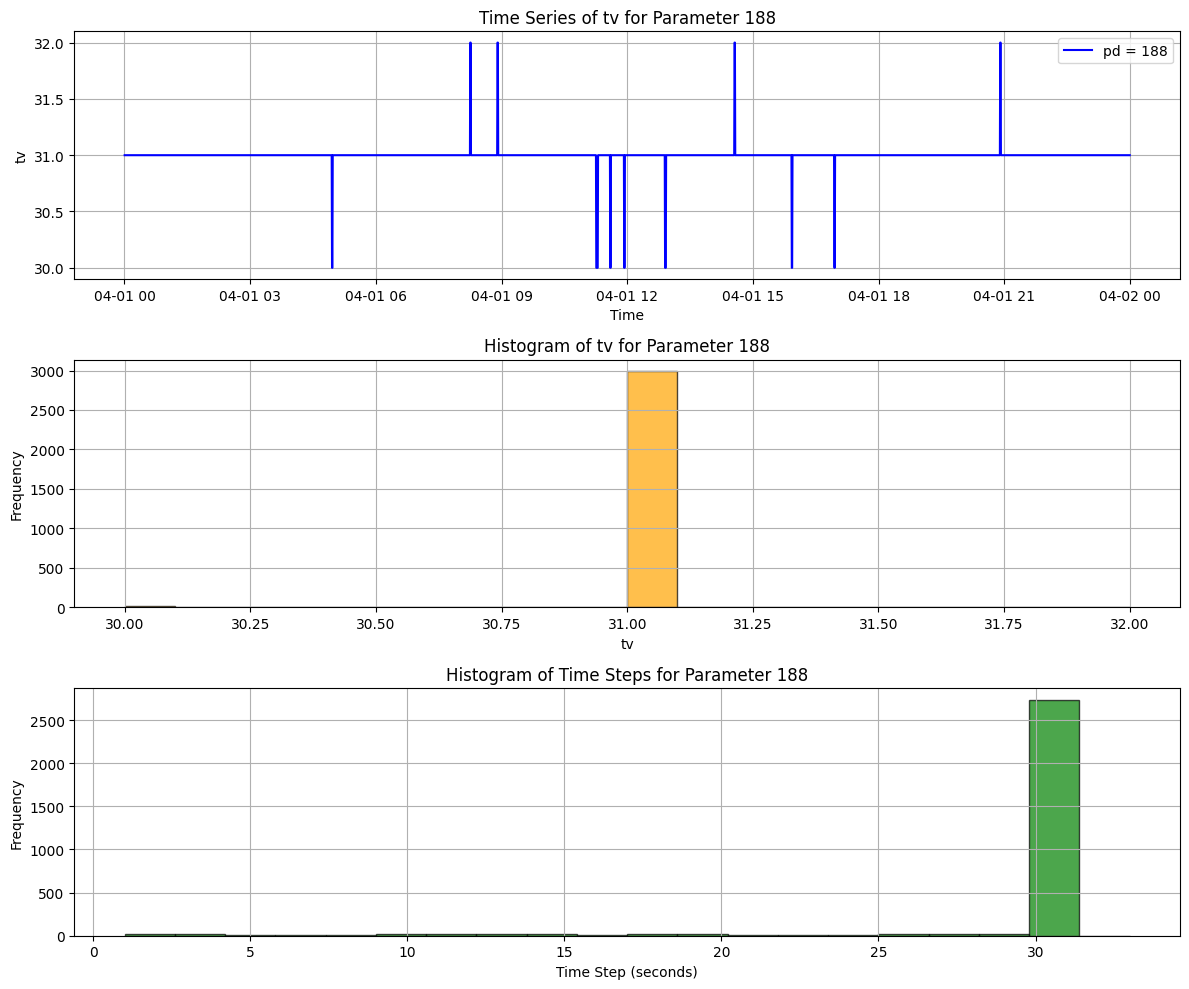


Analyzing Parameter 200:
Basic Statistics:
count    3017.000000
mean       11.114021
std        22.350912
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        63.000000
Name: tv, dtype: float64

Time Step Statistics:
count    3016.000000
mean       28.637599
std         4.991033
min         1.000000
25%        30.000000
50%        30.000000
75%        30.000000
max        33.000000
Name: time_step, dtype: float64


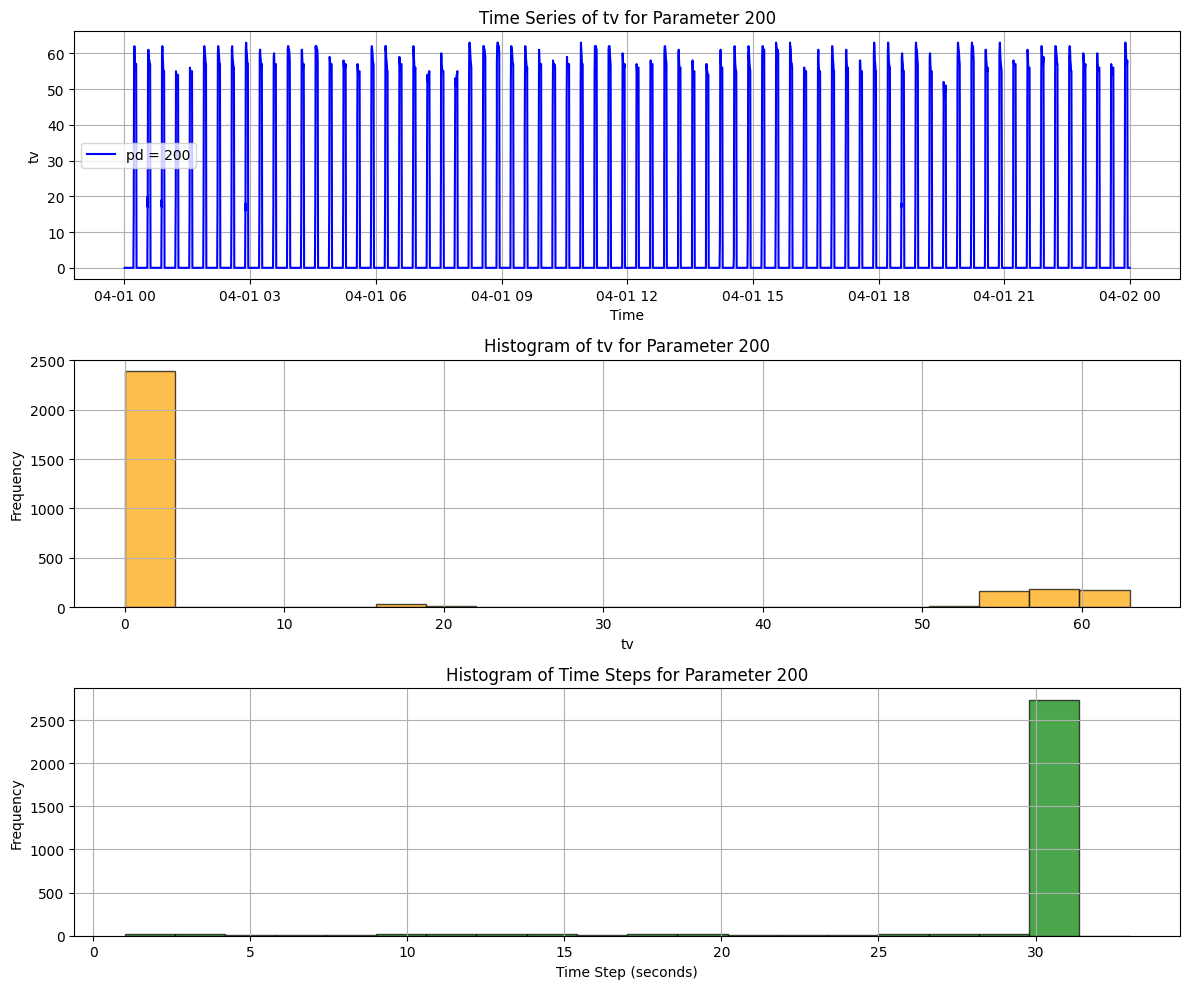


Analyzing Parameter 220:
Basic Statistics:
count    3017.000000
mean       11.418462
std        22.665335
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        58.000000
Name: tv, dtype: float64

Time Step Statistics:
count    3016.000000
mean       28.637599
std         4.991033
min         1.000000
25%        30.000000
50%        30.000000
75%        30.000000
max        33.000000
Name: time_step, dtype: float64


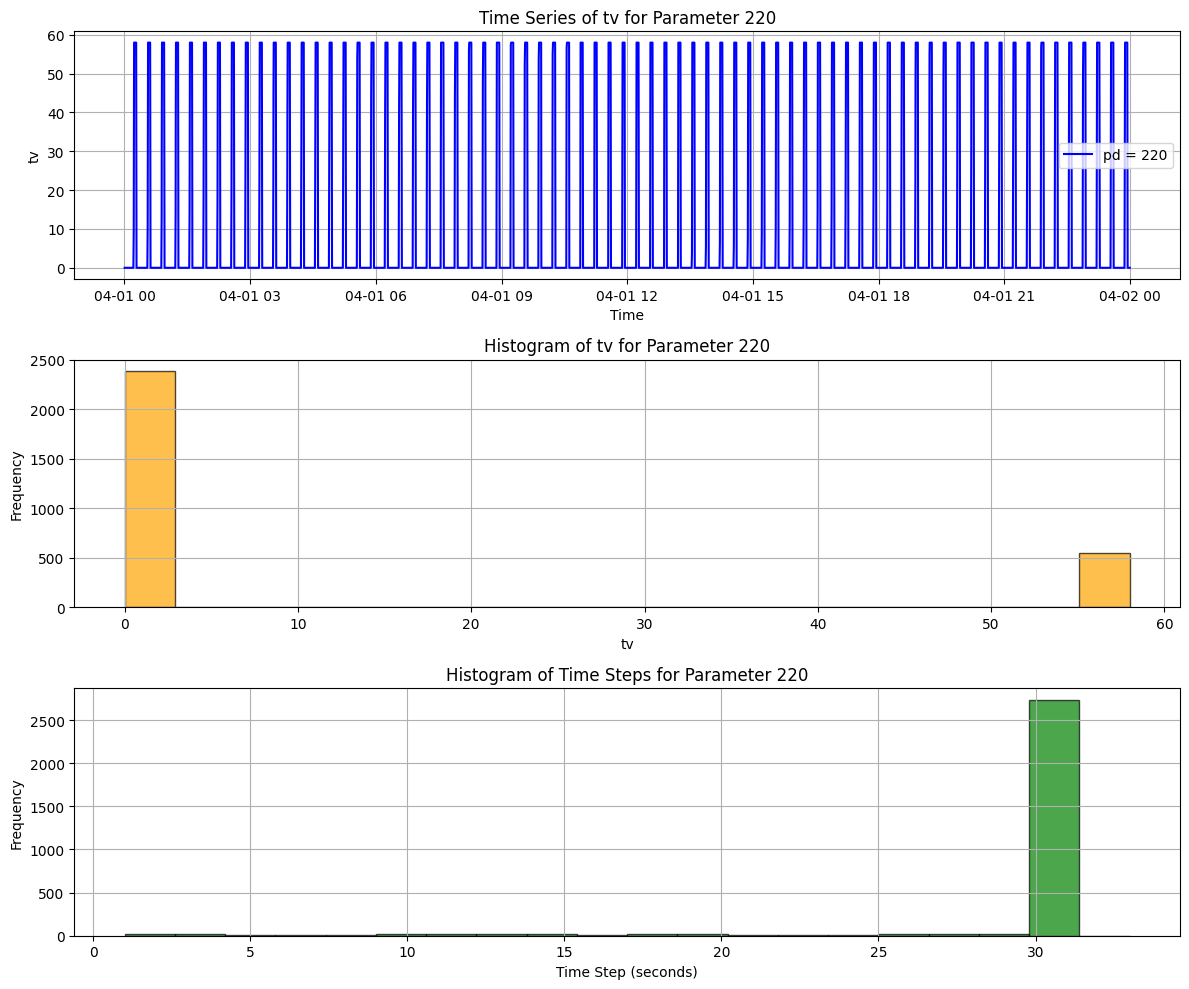


Analyzing Parameter 401:
Basic Statistics:
count    3017.000000
mean        7.470434
std        14.606201
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max        39.500000
Name: tv, dtype: float64

Time Step Statistics:
count    3016.000000
mean       28.637599
std         4.991033
min         1.000000
25%        30.000000
50%        30.000000
75%        30.000000
max        33.000000
Name: time_step, dtype: float64


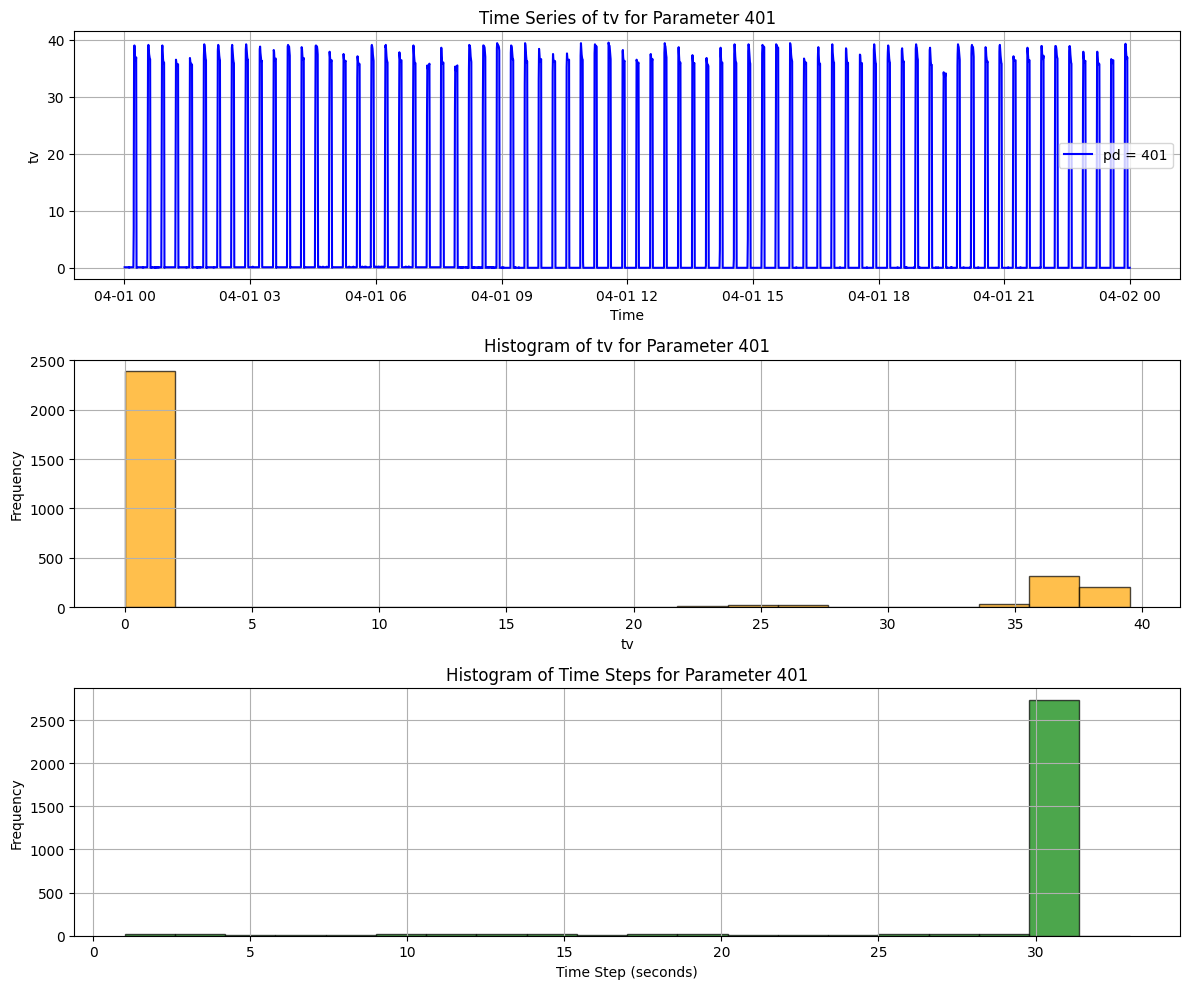


Analyzing Parameter 1451:
Basic Statistics:
count    143.000000
mean       0.503497
std        0.501745
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: tv, dtype: float64

Time Step Statistics:
count     142.000000
mean      601.366197
std       363.381918
min       239.000000
25%       240.000000
50%       601.000000
75%       960.000000
max      1199.000000
Name: time_step, dtype: float64


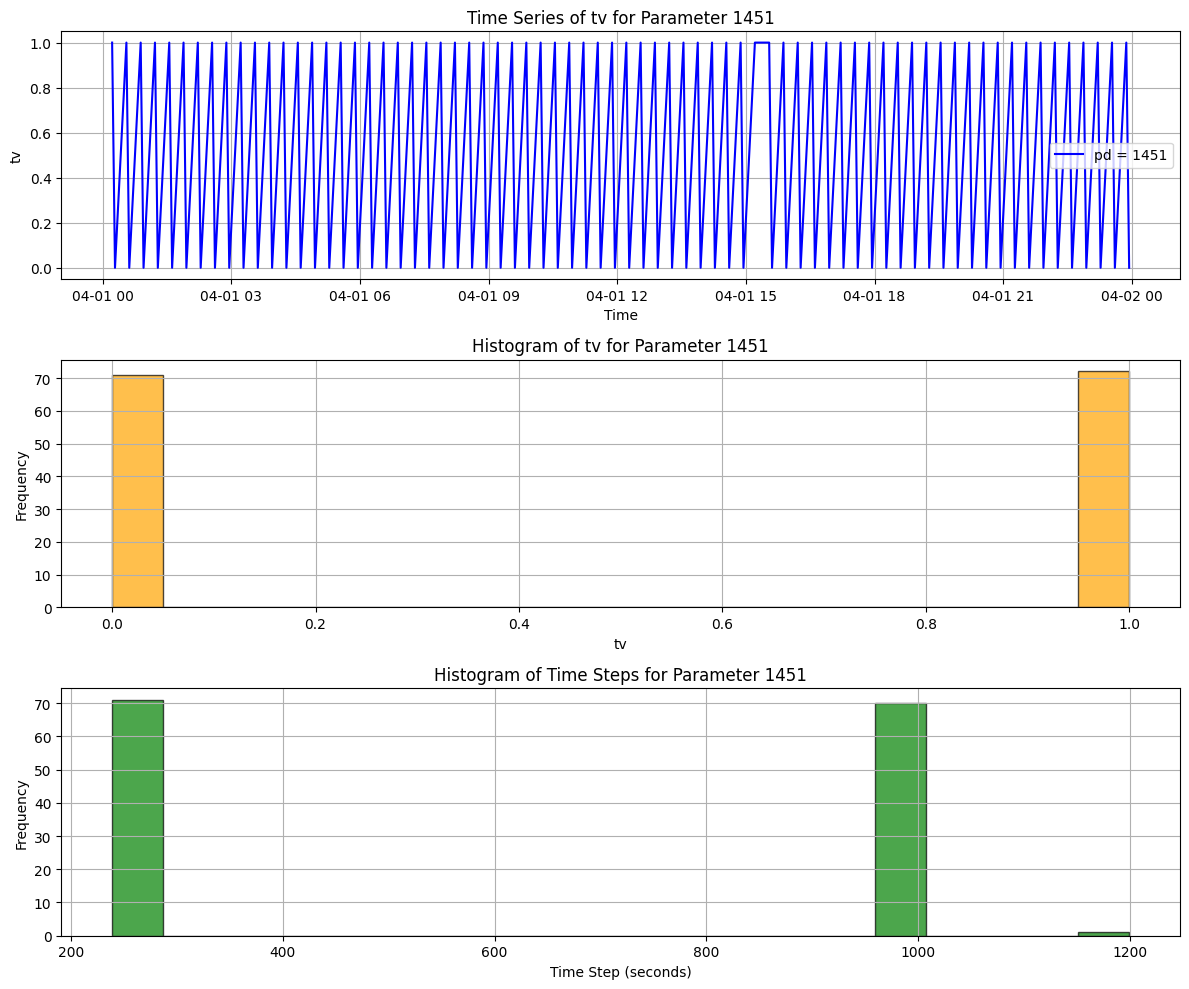

In [23]:
analyze_and_plot_by_parameter(decrypt_df.copy())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_dataframe_with_conversion(df):
    """
    Function to analyze the DataFrame by:
    - Detecting string columns, attempting to convert them to numeric if possible.
    - If conversion fails, replacing string values with dictionary indexes based on frequency.
    - Generating basic statistics, visualizing distributions, and checking for correlations and outliers.

    Parameters:
    df (pd.DataFrame): The DataFrame to be analyzed.
    """
    # Step 1: Identify datetime columns
    datetime_columns = df.select_dtypes(include=['datetime64']).columns

    # Step 1: Detect string columns
    string_columns = df.select_dtypes(include=['object']).columns  # Detect columns with string (object) type

    for col in string_columns:
        try:
            # Attempt to convert the column to numeric
            df[col] = pd.to_numeric(df[col], errors='raise')
            print(f"Column '{col}' successfully converted to numeric.")
        except ValueError:
            # Conversion failed; process as a string column
            print(f"Column '{col}' contains non-numeric strings. Mapping to dictionary indices.")

            # Calculate the frequency of each unique string value in the column
            value_counts = df[col].value_counts()

            # Create a dictionary where the key is the string value, and the value is the index (based on frequency)
            value_dict = {value: idx for idx, value in enumerate(value_counts.index)}

            # Replace string values in the column with their corresponding index from the dictionary
            df[col] = df[col].map(value_dict)

            # Print the dictionary of mapped values
            print(f"\nDictionary for column '{col}' based on frequency:")
            print(value_dict)

    # Step 2: Perform general analysis after processing all columns
    print("\nBasic Statistics (Descriptive):")
    print(df.describe())

    print("\nMissing Values:")
    print(df.isnull().sum())

    # Plot Distribution of Each Column
    plt.figure(figsize=(14, 12))
    df.hist(bins=20, figsize=(16, 14), layout=(6, 4), edgecolor='black')
    plt.suptitle('Distributions of All Parameters')
    plt.tight_layout()
    plt.show()

    # Correlation Heatmap
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.title('Correlation Heatmap of Parameters')
    plt.show()

    # Pairplot to show relationships between pairs of columns (optional, can be slow for large datasets)
    if df.shape[1] <= 6:  # Only plot pairplot for datasets with fewer columns to avoid clutter
        sns.pairplot(df)
        plt.suptitle('Pairplot of Parameters', y=1.02)
        plt.show()

    # Detecting Outliers using boxplots
    plt.figure(figsize=(16, 12))
    sns.boxplot(data=df, width=0.5, palette="Set2")
    plt.title('Boxplot to Detect Outliers for Each Parameter')
    plt.xticks(rotation=90)
    plt.show()

    # # Detecting Skewness for each column
    non_datetime_df = df.drop(columns=datetime_columns, errors='ignore')
    skewness = non_datetime_df.skew()
    print("\nSkewness of Each Column (Excluding Datetime):")
    print(skewness)

    # Check for constant columns
    constant_columns = df.columns[df.nunique() == 1]
    print(f"\nConstant Columns (No Variance): {constant_columns.tolist()}")

In [ ]:
analyze_dataframe_with_conversion(ri_df.copy())

In [ ]:
analyze_dataframe_with_conversion(decrypt_df.copy())